In [1]:
#An Intutive Explanation of Convolutional Neural Networks
#https://ujjwalkarn.me/2016/08/11/intuitive-explanation-convnets/  
#https://ujjwalkarn.me/2016/08/09/quick-intro-neural-networks/

# **An Artificial Neuron/Perceptron**

In [16]:
#An Artificial neuron or Perceptron is a mathematical model of biological neuron(brain cell).

#A neural network is an interconnected system of perceptrons

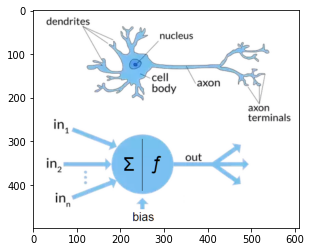

In [18]:
import matplotlib.pyplot as plt
import cv2

img1 = cv2.imread('/content/drive/MyDrive/jupyter_notebooks/deep_learning_fc/data/img1.png')
plt.imshow(img1)

**What does a neuron do?**

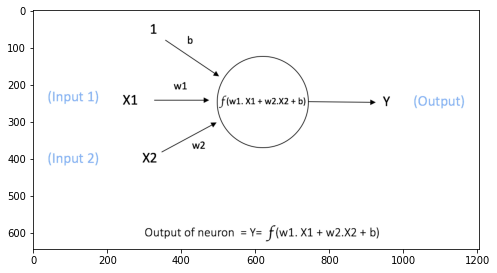

In [23]:
img2 =cv2.imread('/content/drive/MyDrive/jupyter_notebooks/deep_learning_fc/data/img2.png')
img3 =cv2.imread('/content/drive/MyDrive/jupyter_notebooks/deep_learning_fc/data/img3.png')

plt.figure(figsize=(8,12))
plt.imshow(img3)

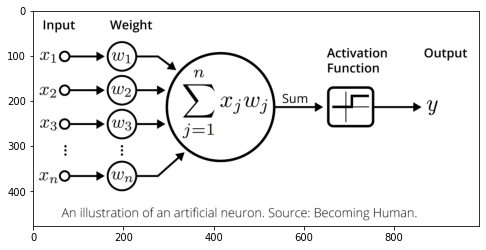

In [24]:
plt.figure(figsize=(8,12))
plt.imshow(img2)

In [25]:
#step-1
#it takes the inputs and multiplies them by their corresponding weights  ---->>>>   w1.x1  w2.x2 .... wn.xn
#Each neuron has a weight vector w=(w1,w2,..,wn), where n is the number of inputs to that neuron.
#These inputs can be either the 'raw' input features- say temp, wind speed for a weather model.
#or can be the output of neurons from an earlier layer.


#step-2
#sums it up  ---->>>> w1.x1 + w2.x2 + .... + wn.xn

#step-3
#Apply 'activation function' to the sum    ----->>> f(w1.x1 + w2.x2 + .... + wn.xn + b)
#The function f is non-linear and is called the 'Activation function'.

## **Introduction to Convets**

**Step-1 Convolution**

In [27]:
#It is imp to note that the convolution captures the local dependencies in the original image.

In [26]:
#The 3x3 matrix is called a 'filter' or 'kernel' or neuron
# and the matrix formed by sliding the filter over the image and computing the "element wise multiplication and addition" is known as
#'Feature map' or 'Activation map'

In [28]:
#A filter is an array of numbers. These numbers are known as weights and parameters.

#A CNN learns the weights of these filters by its own, during the training process
#Although we still need to specify parameters such as "no. of filters", "filter size", "Network Architecture".

In [29]:
#model.add(Conv2D(32,(3,3),activation='relu))
#Since, we are performing convolution using 32 distinct filters, thus we will get 32 different feature maps.

**Step-2 Introducing Non-Linearity**

In [ ]:
#convolution is a linear operation - element wise multiplication and addition.
# y = w1.x1 + w2.x2 + .... + wn.xn

In [30]:
#The purpose of activation function is to add non-linearity.
#This is imp because most of the real-world data we would want our ConvNet to learn would be non-linear.

In [31]:
#Activation functions

#sigmoid: takes a real-valued input and squashes it to a range between 0 and 1
#σ(x) = 1 / (1 + exp(-x))

#tanh: takes a real-valued input and squashes it to a range [-1,1]
#tanh(x) = 2σ(2x) - 1

#Relu: Relu stands for rectified linear unit. it takes a real-valued input and replaces negative values with zero.

 **Step-3 Pooling**

In [32]:
#spatial pooling(also known as downsampling or subsampling) reduces the dimensionality of each feature map, but retains the most imp information.

In [33]:
#It can be of different types: Max, Average, Sum, etc.
#model.add(Maxpool2D((2,2)))

**Step-4 Fully Connected Layer**

In [34]:
#The term "Fully Connected" implies that every neuron in the previous layer is connected to every neuron of the next layer.
#model.add(Dense(64,activation='relu'))

## **Network Building**

In [2]:
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from keras.models import Sequential

In [3]:
#A convet takes as input tensors of shape (img_height,img_width,img_channels) (not including the batch dimension).
#In our case we will configure our convet to process inputs of size (28,28,1), which is the format of MNIST images.
#we do this via passing the argument input_shape =(28,28,1) to our first layer.

In [4]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu'))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


In [6]:
#As we can see output of every Conv2D nd maxpool2D layer is a 3D tensor of shape(height,width,channels).
#The height and width shrinks as we  go deeper in the network.
#The number of channels are controlled by first argument passed to COnv2D layer(e.g. 32 or 64).

In [7]:
#Now we will feed our last output tensor (of shape (3,3,64)) into a densly-connected classifier network.
#These classifiers process 1D-vectors, where as our current output is a 3D-tensor.
#so first we will have to flatten our 3D outputs to 1D.
#then add a few dense layers on top.

In [8]:
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

# **Calculation of trainable parameters**

In [10]:
#https://towardsdatascience.com/understanding-and-calculating-the-number-of-parameters-in-convolution-neural-networks-cnns-fc88790d530d#:~:text=Number%20of%20parameters%20in%20a%20CONV%20layer%20would%20be%20%3A%20((,1)*number%20of%20filters).

In [11]:
#1 input layer

#input layer has nothing to learn. so, no learnable parameters here.Thus, Number of Parameters = 0

In [12]:
#2 CONV layer

#((w * h * p) + 1 ) * c
#((width * height of filter * previous layers filters)  +  bias term for each filter )  *  current layers filters

In [13]:
#3 POOL layer

#since, all it does is calculate a specific number and  no backprop learning involved.
#Hence, this got no learnable parameters.
#parameters = 0

In [14]:
#4 Fully Connected Layer

#(p + 1) * c
#( previous layer's neurons + 1) * current layer's neurons

In [15]:
#(3*3*1 + 1)*32 = 320  if input_shape = (28,28,1)
#(3*3*3 + 1)*32 = 896  if input_shape = (28,28,3)

#(3*3*32 + 1)*64 = 18496
#(3*3*64 + 1)*64 = 36928

#(576 + 1)*64 = 36928
#(64 + 1)*10 = 650

# **Preparing Data**

In [38]:
from keras.datasets import mnist
from keras.utils import to_categorical

In [39]:
(train_data,train_lab),(test_data,test_lab) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [41]:
train_data.shape, test_data.shape

((60000, 28, 28), (10000, 28, 28))

In [42]:
train_data = train_data.reshape(-1,28,28,1)/255
test_data = test_data.reshape(-1,28,28,1)/255

In [43]:
model.compile(optimizer='rmsprop',loss='sparse_categorical_crossentropy',metrics=['acc'])
#this new loss function is still mathematically the same as 'categorical_crossentropy'.
#categorical_crossentropy, expects the labels to follow a 'categorical encoding'.
#with integer labels we should use 'sparse_categorical_crossentropy'

In [45]:
val_data = train_data[:1000]
val_lab = train_lab[:1000]

partial_train_data = train_data[1000:]
partial_train_lab = train_lab[1000:]

model.fit(partial_train_data,partial_train_lab,epochs=20,batch_size=64,validation_data=(val_data,val_lab))

Epoch 1/20
922/922 [==============================] - 41s 44ms/step - loss: 0.0910 - acc: 0.9718 - val_loss: 0.0996 - val_acc: 0.9770
Epoch 2/20
922/922 [==============================] - 40s 43ms/step - loss: 0.0431 - acc: 0.9866 - val_loss: 0.0508 - val_acc: 0.9890
Epoch 3/20
922/922 [==============================] - 40s 43ms/step - loss: 0.0304 - acc: 0.9906 - val_loss: 0.0523 - val_acc: 0.9870
Epoch 4/20
922/922 [==============================] - 40s 43ms/step - loss: 0.0240 - acc: 0.9927 - val_loss: 0.0457 - val_acc: 0.9890
Epoch 5/20
922/922 [==============================] - 40s 43ms/step - loss: 0.0193 - acc: 0.9943 - val_loss: 0.0585 - val_acc: 0.9870
Epoch 6/20
922/922 [==============================] - 40s 43ms/step - loss: 0.0155 - acc: 0.9955 - val_loss: 0.0617 - val_acc: 0.9890
Epoch 7/20
922/922 [==============================] - 40s 43ms/step - loss: 0.0121 - acc: 0.9962 - val_loss: 0.0522 - val_acc: 0.9890
Epoch 8/20
922/922 [==============================] - 40s 43ms

# **Model Evaluation**

In [46]:
dict_ = model.history.history
dict_.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

In [48]:
train_acc = dict_['acc']
train_loss = dict_['loss']
val_acc = dict_['val_acc']
val_loss = dict_['val_loss']
epochs = range(1,len(train_acc)+1)

**Training v/s Validation**

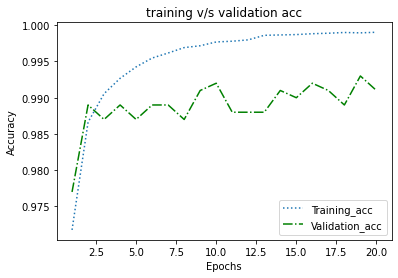

In [49]:
import matplotlib.pyplot as plt

plt.plot(epochs,train_acc,ls=':',label='Training_acc')
plt.plot(epochs,val_acc,ls='-.',color='green',label='Validation_acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('training v/s validation acc')
plt.legend()

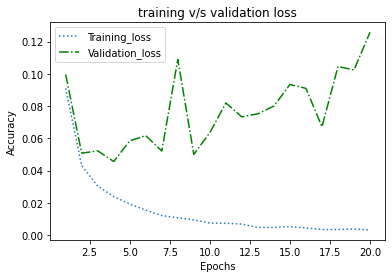

In [50]:
plt.plot(epochs,train_loss,ls=':',label='Training_loss')
plt.plot(epochs,val_loss,ls='-.',color='green',label='Validation_loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('training v/s validation loss')
plt.legend()

**Results on test data**

**Overall loss nd accuracy**

In [51]:
loss,acc = model.evaluate(test_data,test_lab)

313/313 [==============================] - 2s 7ms/step - loss: 0.0698 - acc: 0.9924


In [52]:
print('Loss: ',loss)
print('Acc: ',acc)

Loss:  0.06980124115943909
Acc:  0.9923999905586243
